<a href="https://colab.research.google.com/github/fatemeh-mndz/-breast-cancer-detection/blob/main/NumericRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [29]:
mnist=keras.datasets.mnist


In [30]:
(train_features,train_labels),(test_features,test_labels)=mnist.load_data()

In [31]:
train_features.shape

(60000, 28, 28)

In [32]:
test_features.shape

(10000, 28, 28)

0


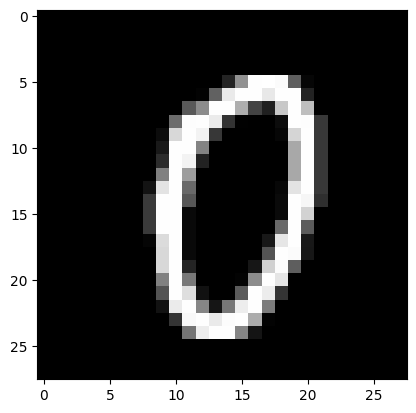

In [33]:
idx=1000
img=train_features[idx]
print(train_labels[idx])
plt.gray()
plt.imshow(img)

# Preprocessing

In [34]:
np.min(img),np.max(img)

(0, 255)

In [35]:
train_features= train_features/255.0
test_features= test_features/255.0

# model defenition

In [36]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

In [37]:
model.compile(optimizer="adam",loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [38]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
hist = model.fit(train_features, train_labels, epochs=1000, batch_size=250, validation_data=(test_features,test_labels))

Epoch 1/1000
240/240 [==============================] - 3s 10ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0686 - val_accuracy: 0.9821
Epoch 2/1000
240/240 [==============================] - 2s 9ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0680 - val_accuracy: 0.9820
Epoch 3/1000
240/240 [==============================] - 2s 6ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0700 - val_accuracy: 0.9822
Epoch 4/1000
240/240 [==============================] - 2s 9ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0690 - val_accuracy: 0.9830
Epoch 5/1000
240/240 [==============================] - 2s 6ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0700 - val_accuracy: 0.9828
Epoch 6/1000
240/240 [==============================] - 2s 9ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0720 - val_accuracy: 0.9829
Epoch 7/1000
240/240 [==============================] - 2s 8ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0727 - val_accuracy

In [41]:
model.evaluate(test_features,test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.2942 - accuracy: 0.9817


[0.2941514253616333, 0.9817000031471252]

In [46]:
idx=100
img=test_features[idx]
print(test_labels[idx])

6


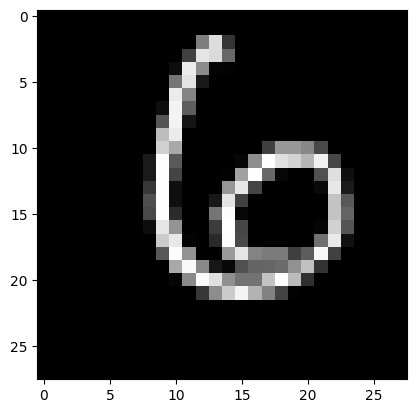

In [47]:
plt.gray()
plt.imshow(img)

In [49]:
test_data=np.reshape(img,(-1,784))
test_data.shape

(1, 784)

In [48]:
model.predict(np.reshape(img,(-1,784)))

1/1 [==============================] - 0s 130ms/step


array([[7.33181862e-34, 0.00000000e+00, 1.19478296e-35, 0.00000000e+00,
        0.00000000e+00, 5.60839757e-32, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]], dtype=float32)

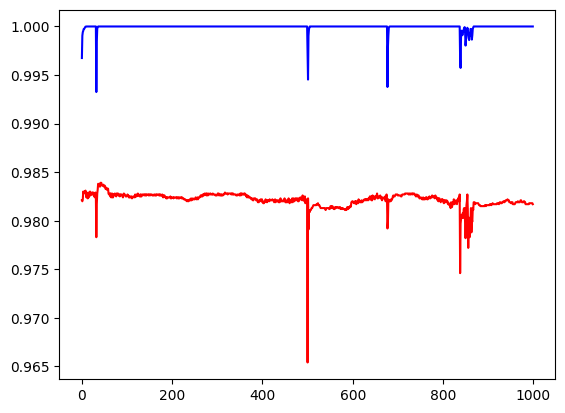

In [51]:
acc= hist.history['accuracy']
val_acc= hist.history["val_accuracy"]

plt.plot(acc,color='blue')
plt.plot(val_acc,color='red')